# Extra Exercise

CSO Projected birth-rates in Ireland.  
Author: Orla Woods

## Projected birth-rates in Ireland

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import csv file
# https://docs.python.org/3/library/csv.html
# https://www.datacamp.com/tutorial/pandas-read-csv?utm_cid=19589720821&utm_aid=157156375191&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=9040164-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other~emea-en~dsa~tofu~tutorial~python&gad_source=1&gad_campaignid=19589720821&gbraid=0AAAAADQ9WsExl9xVUaqHso9VRPl3c2CiA&gclid=CjwKCAjwxrLHBhA2EiwAu9EdM21A8U5l566klHEuLUr8VHiTdFfweCVbX5A5-vkQRVvKZzv2PU5xLBoCOfYQAvD_BwE

# read the csv file
birthrates = pd.read_csv('cso_birthrates.csv')

# view the first 5 rows of the dataframe
birthrates.head()


,Statistic Label,Year,Sex,Criteria for Projection,UNIT,VALUE
0,Projected Annual Births,2023,Both sexes,Method - M1,Number,57537
1,Projected Annual Births,2024,Both sexes,Method - M1,Number,55528
2,Projected Annual Births,2025,Both sexes,Method - M1,Number,55292
3,Projected Annual Births,2026,Both sexes,Method - M1,Number,55032
4,Projected Annual Births,2027,Both sexes,Method - M1,Number,54462


### Plot projected birth-rates

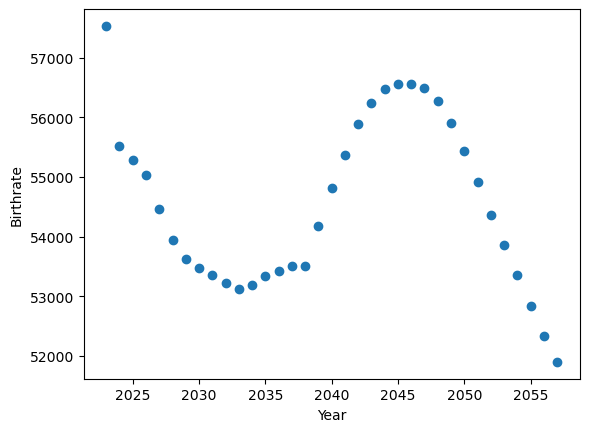

In [2]:
# Scatter plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# https://chatgpt.com/share/68ecc56e-3da8-800d-b992-21c18cabc982

x = birthrates['Year']
y = birthrates['VALUE']

plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Birthrate')
plt.show()


### Population by age

In [3]:
# read the csv file
popbyage = pd.read_csv('popbyage.csv')

# view the first 5 rows of the dataframe
popbyage.head()

,Statistic Label,CensusYear,Sex,Single Year of Age,Administrative Counties,UNIT,VALUE
0,Population,2022,Both sexes,All ages,Ireland,Number,5149139
1,Population,2022,Both sexes,All ages,Carlow County Council,Number,61968
2,Population,2022,Both sexes,All ages,Dublin City Council,Number,592713
3,Population,2022,Both sexes,All ages,Dún Laoghaire Rathdown County Council,Number,233860
4,Population,2022,Both sexes,All ages,Fingal County Council,Number,330506


### Plot Population by age at a National Level: Line Plot

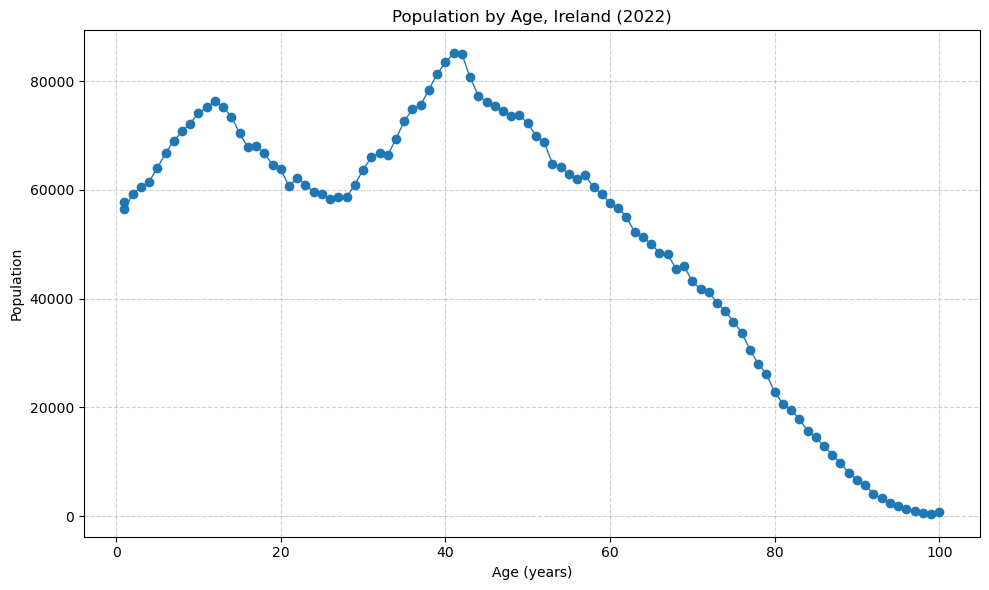

In [ ]:
# scatter plot looks awful with so many datapoints on the x-axis (single years)
# similarly, histogram not suitable, line plot not suitable. 
# try line plot instead
# Using converstion with chatgpt to then change for my imported csv data, as above
# https://chatgpt.com/share/68ed41d0-21c0-800d-acb0-cf9efe19a90f

# Line plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

# Population by age, national level
# Filter for national total
ireland = popbyage[(popbyage["Administrative Counties"] == "Ireland") &
             (popbyage["Sex"] == "Both sexes") &
             (popbyage["Single Year of Age"] != "All ages")]

# Add .copy() to avoid SettingWithCopyWarning
ireland = ireland.copy()

# Convert 'VALUE' to numeric
ireland["VALUE"] = pd.to_numeric(ireland["VALUE"], errors="coerce")

# Clean 'Single Year of Age' (e.g. "Under 1 year" -> 0)
ireland["Age"] = ireland["Single Year of Age"].str.extract(r"(\d+)").fillna(0).astype(int)

# Plot
plt.figure(figsize=(10,6))
plt.plot(ireland["Age"], ireland["VALUE"], marker='o', linewidth=1)
plt.title("Population by Age, Ireland (2022)")
plt.xlabel("Age (years)")
plt.ylabel("Population")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This was an interesting exercise to think about what you can and can't do with a huge datasaet with many variables. Interesting to see that the best thing is probably not to try to show everything but instead to dive into the data and give different perspectives. For this reason I will now (taking ChatGPT's advice) try to view the data by county. 

### Plot Population by Age and County: Heatmap

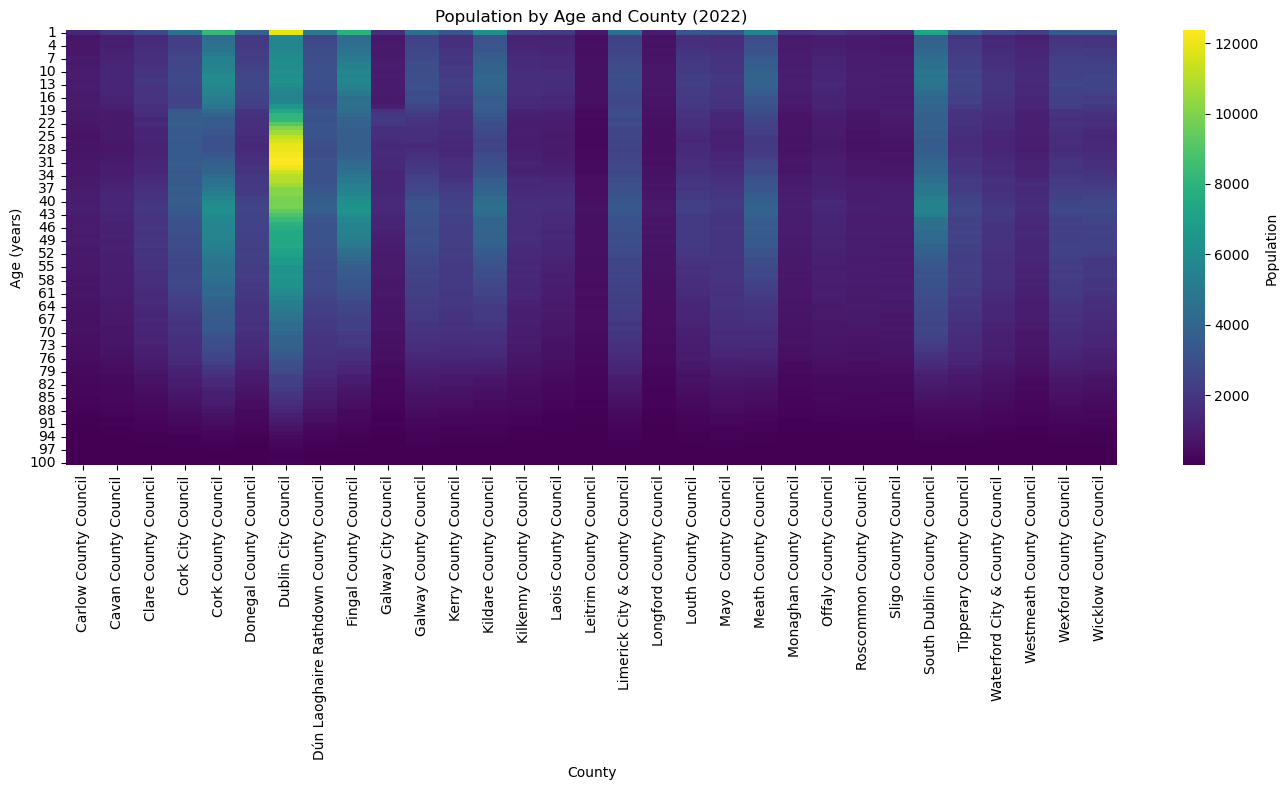

In [10]:
# Following the same conversation with ChatGPT, plot a heatmap
#  https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns

subset = popbyage[
    (popbyage["Sex"] == "Both sexes") &
    (popbyage["Administrative Counties"] != "Ireland") &
    (popbyage["Single Year of Age"] != "All ages")
].copy()  # added .copy() to avoid SettingWithCopyWarning

subset["VALUE"] = pd.to_numeric(subset["VALUE"], errors="coerce")
subset["Age"] = subset["Single Year of Age"].str.extract(r"(\d+)").fillna(0).astype(int)

# Use pivot_table with an aggregation function to handle duplicates
pivot = subset.pivot_table(
    index="Age",
    columns="Administrative Counties",
    values="VALUE",
    aggfunc="sum"  # replaces pivot(), ensures one value per cell
)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="viridis", cbar_kws={'label': 'Population'})
plt.title("Population by Age and County (2022)")
plt.xlabel("County")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()